# Importing GPU

### Note: We need to change runtime type and add a GPU to be able to execute importing the GPU in next code block

## Code block 1 & 2

In [1]:
import tensorflow as tf

#Checking and printing GPU device name
gpu_name = tf.test.gpu_device_name()

if gpu_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(gpu_name))
else:
    raise SystemError('No GPU found.')

Found GPU at: /device:GPU:0


### Importing Pytorch and 

In [2]:
import torch

# Checking for GPUs available and the one which we will use to work on our model
if torch.cuda.is_available():        
    device = torch.device("cuda")
    print('%d GPU(s) available.' % torch.cuda.device_count())
    print('GPU in use:', torch.cuda.get_device_name(0))
else:
    print('GPU is unavailable.')
    device = torch.device("cpu")

1 GPU(s) available.
GPU in use: Tesla T4


### Installing required package for the libraries to be used in the code blocks ahead.

In [3]:
!pip install transformers
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 46.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 112.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=a68866c277f3dee95515b2cb4c96f55b0fffd91841fdf725d3ee31052b0b0d35
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


### Downloading the dataset using URL.

### Note: We are using an exisiting dataset for both of our models i.e. BERT and XLnet.

## Code Block 4, 5 & 6

### Needs to re-run again after transformers asks to restart runtime while running XLNet model

In [3]:
import wget
import os

git_url = 'https://nyu-mll.github.io/CoLA/cola_public_1.1.zip'

if not os.path.exists('./cola_public_1.1.zip'):
    wget.download(git_url, './cola_public_1.1.zip')

print('Dataset downloaded')

Dataset downloaded


### Unzipping the dataset which is downloaded

In [4]:
if not os.path.exists('./cola_public/'):
  !unzip cola_public_1.1.zip

In [5]:
import pandas as pd

data = pd.read_csv("./cola_public/raw/in_domain_train.tsv", delimiter='\t', header=None, 
                 names=['source', 'label', 'label notes', 'sentence'])

print('No. of sentences: {:,}\n'.format(data.shape[0]))

data.sample(50) #displaying 50 random samples from the dataset

No. of sentences: 8,551



,source,label,label notes,sentence
7883,ad03,1,NaN,I assumed him to be innocent
937,bc01,1,NaN,"Although he likes cabbage too, Fred likes eggp..."
8213,ad03,1,NaN,The boys should all could go
3953,ks08,1,NaN,The sexual revolution makes some people uncomf...
6881,m_02,1,NaN,Erika made her mother an omelet and the kitche...
7023,sgww85,1,NaN,They wanted to leave tomorrow or on Tuesday.
4250,ks08,1,NaN,You washed yourself.
4503,ks08,1,NaN,John could not leave the town.
1947,r-67,0,*,I didn't eat any ice cream and any cake.
4160,ks08,1,NaN,Two miles is as far as they can walk.


### Getting list of sentences and labels.

In [7]:
sentences = data.sentence.values
labels = data.label.values

## Introduction to BERT Model

### Importing required libraries and downloading the tokenizer

In [8]:
from transformers import BertTokenizer

print('Loading BERT tokenizer')
BERT_tokenizer = BertTokenizer.from_pretrained('bert-base-cased', do_lower_case=False)

Loading BERT tokenizer


Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [9]:
print('Sentence: ', sentences[125]) #Choose a sentence to be printed from dataset

print('Using BERT tokenizer on sentence: ', BERT_tokenizer.tokenize(sentences[125])) #Use BERT tokenizer on the sentence

print('Token IDs for sentence: ', BERT_tokenizer.convert_tokens_to_ids(BERT_tokenizer.tokenize(sentences[0]))) #Token IDs

Sentence:  As it rains harder, how much faster a flow appears in the river?
Using BERT tokenizer on sentence:  ['As', 'it', 'rains', 'harder', ',', 'how', 'much', 'faster', 'a', 'flow', 'appears', 'in', 'the', 'river', '?']
Token IDs for sentence:  [3458, 2053, 1281, 112, 189, 4417, 1142, 3622, 117, 1519, 2041, 1103, 1397, 1141, 1195, 17794, 119]


In [10]:
# Tokenize all of the sentences and map the tokens to their word IDs.
input_ids = []
attention_masks = []

for sent in sentences:
    encoded_dict = BERT_tokenizer.encode_plus(
                        sent,                      
                        add_special_tokens = True, 
                        max_length = 64,          
                        pad_to_max_length = True,
                        return_attention_mask = True,  
                        return_tensors = 'pt',     
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Print sentence 130, now as a list of IDs.
print('Original: ', sentences[130])
print('Token IDs:', input_ids[130])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:2336: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Original:  The more John eats, the tighter keep your mouth shut about it.
Token IDs: tensor([  101,  1109,  1167,  1287, 24347,   117,  1103, 12567,  1712,  1240,
         1779,  3210,  1164,  1122,   119,   102,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0])


In [11]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 85-15 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.85 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
print('There are {:>5,} training samples.'.format(train_size))
print('There are {:>5,} validation samples.'.format(val_size))

There are 7,268 training samples.
There are 1,283 validation samples.


In [12]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 32 
 
train_dataloader = DataLoader(
            train_dataset,  
            sampler = RandomSampler(train_dataset),
            batch_size = batch_size # Trains with this batch size.
        )

validation_dataloader = DataLoader(
            val_dataset, 
            sampler = SequentialSampler(val_dataset),
            batch_size = batch_size
        )

In [13]:
from transformers import BertForSequenceClassification, AdamW, BertConfig
 
model = BertForSequenceClassification.from_pretrained(
    "bert-base-cased", 
    num_labels = 5,   
    output_attentions = False, 
    output_hidden_states = False, 
)
model.cuda()

Downloading:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [14]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')
for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')
for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')
for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (28996, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (

In [15]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
optimizer = AdamW(model.parameters(),
                  lr = 5e-5, # default is 5e-5
                  eps = 1e-8 # default is 1e-8.
                )
     

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [16]:
from transformers import get_linear_schedule_with_warmup

epochs = 4 # can range between 2 and 4

total_steps = len(train_dataloader) * epochs

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)


In [17]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [18]:
import time
import datetime

def format_time(elapsed):
    '''Takes a time in seconds and returns a string hh:mm:ss'''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [19]:
import random
import numpy as np

# Set the seed value
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)


training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
   

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    
    model.train()

        # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

       
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        model.zero_grad()

        p= model(b_input_ids, 
                             token_type_ids=None, 
                             attention_mask=b_input_mask, 
                             labels=b_labels)
        loss=p[0]
        logits=p[1]
        
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epoch took: {:}".format(training_time))
    print("")
    print("Running Validation")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
       
        with torch.no_grad():        

            q = model(b_input_ids, 
                                   token_type_ids=None, 
                                   attention_mask=b_input_mask,
                                   labels=b_labels)
            loss=q[0]
            logits=q[1]
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))        


======== Epoch 1 / 4 ========
Training...
  Batch    40  of    228.    Elapsed: 0:00:15.
  Batch    80  of    228.    Elapsed: 0:00:28.
  Batch   120  of    228.    Elapsed: 0:00:41.
  Batch   160  of    228.    Elapsed: 0:00:55.
  Batch   200  of    228.    Elapsed: 0:01:08.

  Average training loss: 0.53
  Training epoch took: 0:01:18

Running Validation
  Accuracy: 0.82
  Validation Loss: 0.42
  Validation took: 0:00:05

======== Epoch 2 / 4 ========
Training...
  Batch    40  of    228.    Elapsed: 0:00:14.
  Batch    80  of    228.    Elapsed: 0:00:28.
  Batch   120  of    228.    Elapsed: 0:00:41.
  Batch   160  of    228.    Elapsed: 0:00:55.
  Batch   200  of    228.    Elapsed: 0:01:09.

  Average training loss: 0.27
  Training epoch took: 0:01:18

Running Validation
  Accuracy: 0.84
  Validation Loss: 0.43
  Validation took: 0:00:05

======== Epoch 3 / 4 ========
Training...
  Batch    40  of    228.    Elapsed: 0:00:14.
  Batch    80  of    228.    Elapsed: 0:00:27.
  Batch

In [20]:
import pandas as pd

# Display floats with four decimal places.
pd.set_option('precision', 4)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# Display the table.
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,0.5320,0.4191,0.8232,0:01:18,0:00:05
2,0.2686,0.4283,0.8448,0:01:18,0:00:05
3,0.1432,0.5577,0.8440,0:01:18,0:00:05
4,0.0689,0.7158,0.8402,0:01:17,0:00:05


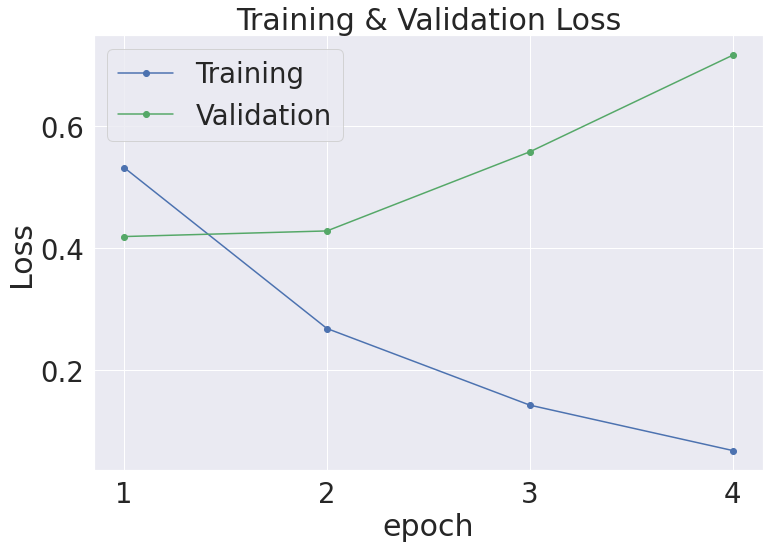

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='whitegrid')

# Increase the plot size and font size.
sns.set(font_scale=2.5)
plt.rcParams["figure.figsize"] = (12,8)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()

In [22]:
# Load the dataset into a pandas dataframe.
df = pd.read_csv("./cola_public/raw/out_of_domain_dev.tsv", delimiter='\t', header=None, names=['sentence_source', 'label', 'label_notes', 'sentence'])

# Report the number of sentences.
print('Number of test sentences: {:,}\n'.format(df.shape[0]))

# Create sentence and label lists
sentences = df.sentence.values
labels = df.label.values

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    encoded_dict = BERT_tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Set the batch size.  
batch_size = 40 

# Create the DataLoader.
prediction_data = TensorDataset(input_ids, attention_masks, labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)
     

Number of test sentences: 516



/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:2336: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [23]:
# Prediction on test set

print('Predicting labels for {:,} test sentences.'.format(len(input_ids)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)

  logits = outputs[0]

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)


print('Prediction done!')

Predicting labels for 516 test sentences.
Prediction done!


Calculating Matthews Corr. Coef. for each batch...


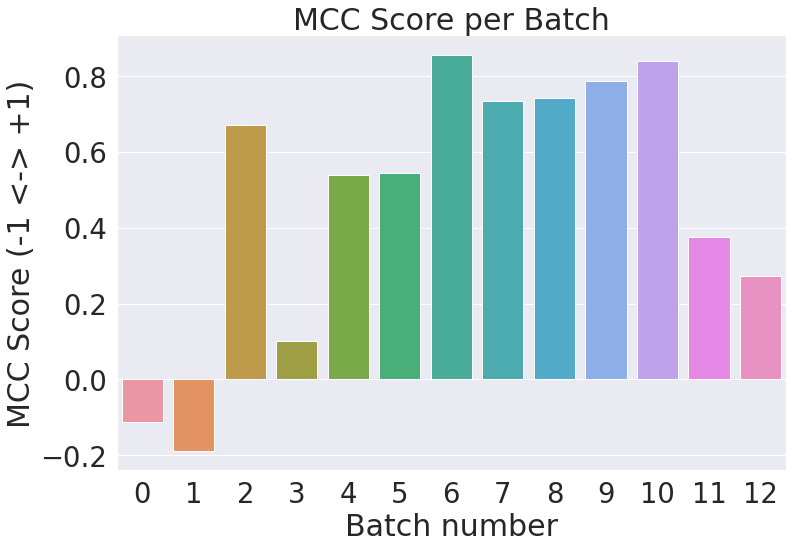

Total MCC: 0.498


In [24]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score

matthews_set = []

# Evaluate each test batch using Matthew's correlation coefficient
print('Calculating Matthews Corr. Coef. for each batch...')

# For each input batch...
for i in range(len(true_labels)):
  pred_labels_i = np.argmax(predictions[i], axis=1).flatten()
  # Calculate and store the coef for this batch.  
  matthews = matthews_corrcoef(true_labels[i], pred_labels_i)                
  matthews_set.append(matthews)

# Create a barplot showing the MCC score for each batch of test samples.
ax = sns.barplot(x=list(range(len(matthews_set))), y=matthews_set, ci=None)
plt.title('MCC Score per Batch')
plt.ylabel('MCC Score (-1 <-> +1)')
plt.xlabel('Batch number')
plt.show()

# Combine the results across all batches. 
flat_predictions = np.concatenate(predictions, axis=0)
# For each sample, pick the label (0 or 1) with the higher score.
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()
# Combine the correct labels for each batch into a single list.
flat_true_labels = np.concatenate(true_labels, axis=0)
# Calculate the MCC
mcc = matthews_corrcoef(flat_true_labels, flat_predictions)
print('Total MCC: %.3f' % mcc)

## Confusion Matrix

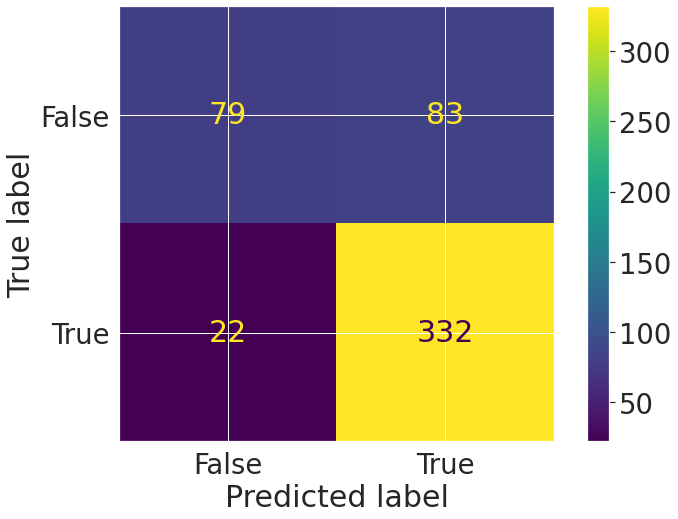

In [25]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = flat_true_labels
predicted = flat_predictions

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

## Word cloud

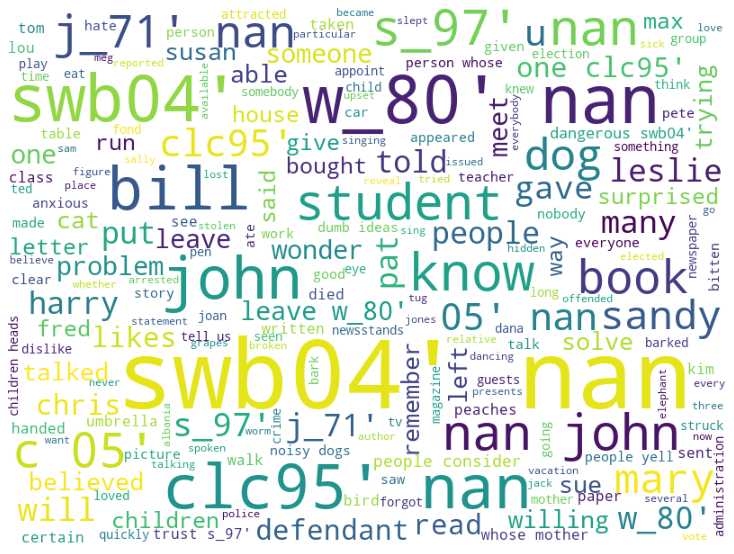

In [26]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
# Reads 'Youtube04-Eminem.csv' file
#df = pd.read_csv("./cola_public/raw/out_of_domain_dev.tsv", delimiter='\t', header=None, names=['sentence_source', 'label', 'label_notes', 'sentence'])
 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.values:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 600,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 12).generate(comment_words)
 
# plot the WordCloud image
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## Evaluation metrics

In [27]:
# precision
from sklearn.metrics import precision_score
prec= precision_score(flat_true_labels, flat_predictions, average='weighted') # average can be changed between micro, macro and weighted

In [28]:
# recall
from sklearn.metrics import recall_score
recall= recall_score(flat_true_labels, flat_predictions, average='micro')

In [29]:
# f1 score
from sklearn.metrics import f1_score
actual = flat_true_labels
pred = flat_predictions
f1= f1_score(actual, pred)

In [30]:
# accuracy
from sklearn.metrics import accuracy_score
acc= accuracy_score(flat_true_labels, flat_predictions)

In [31]:
print("The metrics score for our model are:")
print("*****************************************")
print("Precision is: ", prec)
print("Recall is: ", recall)
print("F1 score is: ", f1)
print("Accuracy is: ", acc)
print("*****************************************")

The metrics score for our model are:
*****************************************
Precision is:  0.7944047893161409
Recall is:  0.7965116279069767
F1 score is:  0.8634590377113134
Accuracy is:  0.7965116279069767
*****************************************


In [32]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [33]:
import os
output_dir = '/content/gdrive/MyDrive/Colab Notebooks/BERT/'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)

model_to_save = model.module if hasattr(model, 'module') else model
model_to_save.save_pretrained(output_dir)
BERT_tokenizer.save_pretrained(output_dir)

Saving model to /content/gdrive/MyDrive/Colab Notebooks/BERT/


('/content/gdrive/MyDrive/Colab Notebooks/BERT/tokenizer_config.json',
 '/content/gdrive/MyDrive/Colab Notebooks/BERT/special_tokens_map.json',
 '/content/gdrive/MyDrive/Colab Notebooks/BERT/vocab.txt',
 '/content/gdrive/MyDrive/Colab Notebooks/BERT/added_tokens.json')

In [34]:
from transformers import BertTokenizer
import torch
# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained(output_dir)
print('Loading BERT model...')
model_loaded = BertForSequenceClassification.from_pretrained(output_dir)

Loading BERT tokenizer...
Loading BERT model...


## Lets check the model using a random english sentence.

In [51]:
# Let's check it for a given sentence
#sent = "As he crossed toward the pharmacy at the corner he involuntarily turned his head because of a burst of light that had ricocheted from his temple, and saw, with that quick smile with which we greet a rainbow or a rose, a blindingly white parallelogram of sky being unloaded from the van—a dresser with mirrors across which, as across a cinema screen, passed a flawlessly clear reflection of boughs sliding and swaying not arboreally, but with a human vacillation, produced by the nature of those who were carrying this sky, these boughs, this gliding façade."
#sent = "Buffalo buffalo Buffalo buffalo buffalo buffalo Buffalo buffalo."
#sent = "James while John had had had had had had had had had had had a better effect on the teacher."
#sent = "Rose rose to put rose roes on her rows of roses."
#sent = "Will, will will will will will's will?"
#sent = "The complex houses married and single soldiers and their families."
#sent = "If I was a rich man, I would buy you a new shirt."
#sent = "We're finished cleaning the bathroom."
#sent = "A little spark kindles great fire."
#sent = "They had no sooner arrived then they were arguing."
sent = "My sister's all the books have been stolen."
encoded_dict = tokenizer.encode_plus(
                        sent,                      
                        add_special_tokens = True, 
                        max_length = 64,           
                        pad_to_max_length = True,
                        return_attention_mask = True,   
                        return_tensors = 'pt',     
                   )
    
# Add the encoded sentence to the list.    
input_id = encoded_dict['input_ids']
    
# And its attention mask (simply differentiates padding from non-padding).
attention_mask = encoded_dict['attention_mask']
input_id = torch.LongTensor(input_id)
attention_mask = torch.LongTensor(attention_mask)
     

## POS Tagger

In [36]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
tokens = nltk.word_tokenize(sent)
print(tokens)
tag = nltk.pos_tag(tokens)
print(tag)
grammar = "NP: {<DT>?<JJ>*<NN>}"
cp  =nltk.RegexpParser(grammar)
result = cp.parse(tag)
print(result)
#result.draw() 
#root.mainloop()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


['Buffalo', 'buffalo', 'Buffalo', 'buffalo', 'buffalo', 'buffalo', 'Buffalo', 'buffalo', '.']
[('Buffalo', 'NNP'), ('buffalo', 'NN'), ('Buffalo', 'NNP'), ('buffalo', 'NN'), ('buffalo', 'NN'), ('buffalo', 'NN'), ('Buffalo', 'NNP'), ('buffalo', 'NN'), ('.', '.')]
(S
  Buffalo/NNP
  (NP buffalo/NN)
  Buffalo/NNP
  (NP buffalo/NN)
  (NP buffalo/NN)
  (NP buffalo/NN)
  Buffalo/NNP
  (NP buffalo/NN)
  ./.)


## POS Counter

In [37]:
from collections import Counter
import nltk
lower_case = sent.lower()
tokens = nltk.word_tokenize(lower_case)
tags = nltk.pos_tag(tokens)
counts = Counter( tag for word,  tag in tags)
print(counts)

Counter({'NN': 8, '.': 1})


## Frequency Distribution Plot

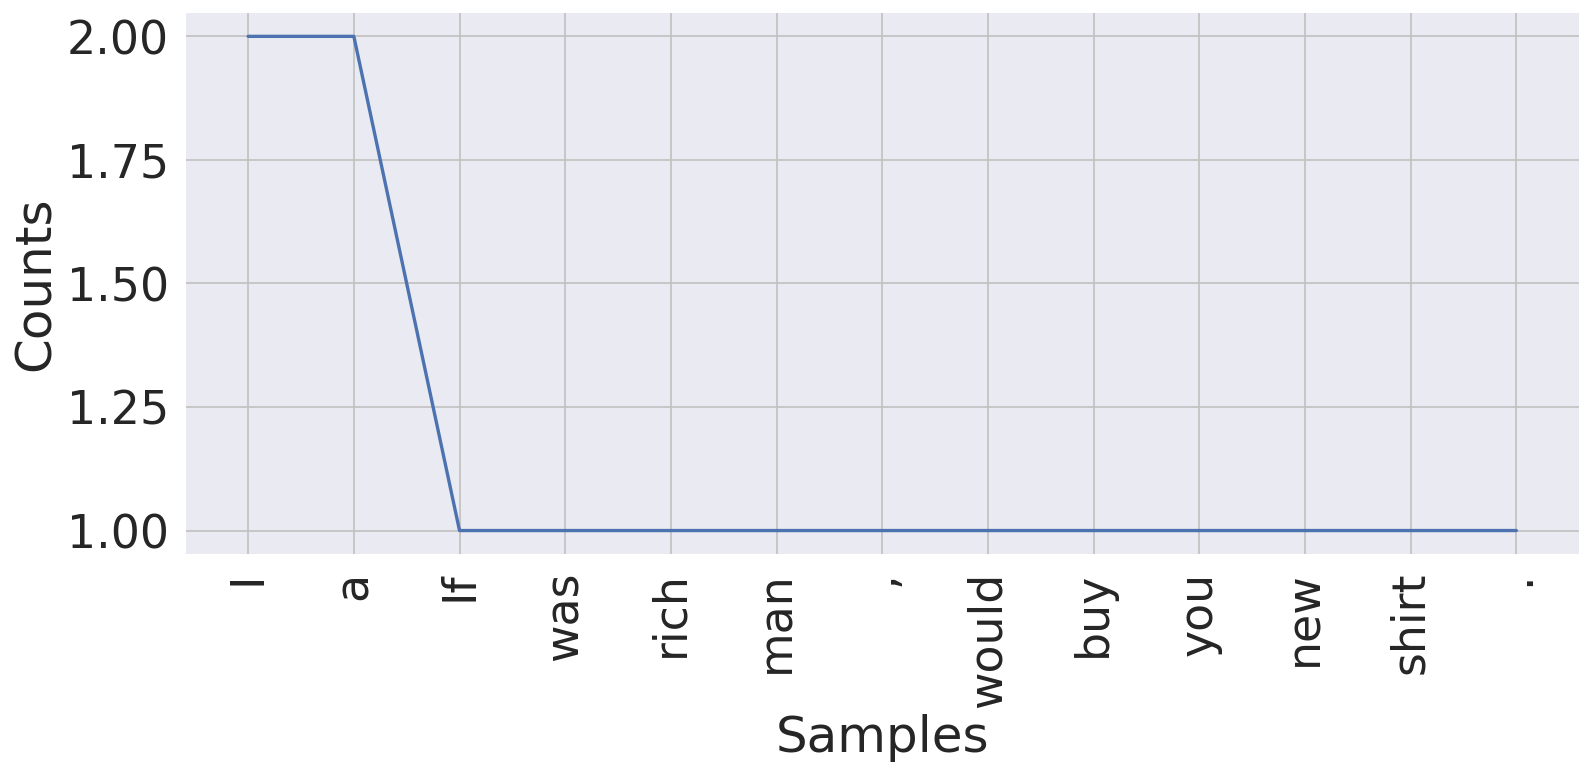

In [43]:
import nltk
%matplotlib inline
from matplotlib.pyplot import figure
figure(figsize=(15, 6), dpi=120)
words = nltk.tokenize.word_tokenize(sent)
fd = nltk.FreqDist(words)
fd.plot()

## Checking the BERT model

In [52]:
with torch.no_grad():
  # Forward pass, calculate logit predictions
  outputs = model_loaded(input_id, token_type_ids=None, attention_mask=attention_mask)

logits = outputs[0]
index = logits.argmax()
if index == 1:
  print("Gramatically correct")
else:
  print("Gramatically in-correct")

Gramatically in-correct


##Introduction to XLNET Model


In [53]:
!pip install pytorch-transformers
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.4/176.4 KB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 KB 25.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.7/132.7 KB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 KB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 16.9 MB/s eta 0:00:00
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=8b9034ae364bbf68918a47c261eae071282d7082cfc0951b9bd7767ba764f759
  Stored in directory: /root/.cache/pip/wheels/82/ab/9b/c15899bf659ba74f623ac776e861cf2eb8608c1825ddec66a4
Successfully built sacremose

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Operation cancelled by user


## After the above code block as to restart runtime,go on the top and re-run code blocks 1,2,4,5 and 6.

In [6]:
sentences = data.sentence.values
labels = data.label.values

In [7]:
sentences = [sentence + " [SEP] [CLS]" for sentence in sentences]

In [8]:
from transformers import XLNetTokenizer
tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased')

Downloading:   0%|          | 0.00/798k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/760 [00:00<?, ?B/s]

In [9]:
tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]

In [10]:
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]

In [11]:
# Print the original sentence.
print(' Original: ', sentences[120])
# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(sentences[120]))
# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))

 Original:  The harder it rains, how much faster that do you run? [SEP] [CLS]
Tokenized:  ['▁The', '▁harder', '▁it', '▁rains', ',', '▁how', '▁much', '▁faster', '▁that', '▁do', '▁you', '▁run', '?', '▁[', 'S', 'EP', ']', '▁[', 'CL', 'S', ']']
Token IDs:  [1146, 1003, 282, 26, 46, 971, 52, 2185, 19, 618, 1412, 18, 244, 65, 80, 12797, 9, 4145, 83, 8186, 3158, 4145, 7416, 83, 3158]


In [12]:
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras_preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tqdm import tqdm, trange
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
input_ids = pad_sequences(input_ids, maxlen=128, dtype="long", truncating="post", padding="post")

In [14]:
attention_masks = []
# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask)

In [15]:
#Use train_test_split to split our data into train and validation sets for training

train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels, 
                                                            random_state=56, test_size=0.15)
train_masks, validation_masks, _, _ = train_test_split(attention_masks, input_ids,
                                             random_state=56, test_size=0.15)

In [16]:
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)
train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)
train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

In [17]:
# Select a batch size for training.
batch_size =32

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [18]:
# Load XLNEtForSequenceClassification, the pretrained XLNet model with a single linear classification layer on top. 
from transformers import XLNetTokenizer,XLNetForSequenceClassification
model = XLNetForSequenceClassification.from_pretrained("xlnet-base-cased", num_labels=2)
model.cuda()

Downloading:   0%|          | 0.00/467M [00:00<?, ?B/s]

Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetForSequenceClassification: ['lm_loss.weight', 'lm_loss.bias']
- This IS expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.bias', 'sequence_summary.summary.weight', 'sequence_summary.summary.bias', 'logits_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions a

XLNetForSequenceClassification(
  (transformer): XLNetModel(
    (word_embedding): Embedding(32000, 768)
    (layer): ModuleList(
      (0): XLNetLayer(
        (rel_attn): XLNetRelativeAttention(
          (layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (ff): XLNetFeedForward(
          (layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (layer_1): Linear(in_features=768, out_features=3072, bias=True)
          (layer_2): Linear(in_features=3072, out_features=768, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (activation_function): GELUActivation()
        )
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (1): XLNetLayer(
        (rel_attn): XLNetRelativeAttention(
          (layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (ff): XLNetFeedForward

In [19]:
param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.0}
]
     

In [20]:
from transformers import AdamW
optimizer = AdamW(model.parameters(),
                  lr = 3e-5, # args.learning_rate - default is 5e-5
                  eps = 1e-5 # args.adam_epsilon  - default is 1e-8.
                )

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [21]:
import numpy as np
# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)


In [22]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))

    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [23]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4. 
epochs = 4

total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [24]:
import numpy as np
# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [25]:
import random
import numpy as np

seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
   

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        model.zero_grad()        

        p= model(b_input_ids, 
                             token_type_ids=None, 
                             attention_mask=b_input_mask, 
                             labels=b_labels)
        loss=p[0]
        logits=p[1]
        
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epoch took: {:}".format(training_time))


    print("")
    print("Running Validation...")

    t0 = time.time()

    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            q = model(b_input_ids, 
                                   token_type_ids=None, 
                                   attention_mask=b_input_mask,
                                   labels=b_labels)
            loss=q[0]
            logits=q[1]
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        total_eval_accuracy += flat_accuracy(logits, label_ids)

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 4 ========
Training...
  Batch    40  of    228.    Elapsed: 0:00:35.
  Batch    80  of    228.    Elapsed: 0:01:09.
  Batch   120  of    228.    Elapsed: 0:01:42.
  Batch   160  of    228.    Elapsed: 0:02:15.
  Batch   200  of    228.    Elapsed: 0:02:49.

  Average training loss: 0.61
  Training epoch took: 0:03:11

Running Validation...
  Accuracy: 0.73
  Validation Loss: 0.54
  Validation took: 0:00:14

======== Epoch 2 / 4 ========
Training...
  Batch    40  of    228.    Elapsed: 0:00:33.
  Batch    80  of    228.    Elapsed: 0:01:07.
  Batch   120  of    228.    Elapsed: 0:01:40.
  Batch   160  of    228.    Elapsed: 0:02:13.
  Batch   200  of    228.    Elapsed: 0:02:46.

  Average training loss: 0.51
  Training epoch took: 0:03:09

Running Validation...
  Accuracy: 0.77
  Validation Loss: 0.54
  Validation took: 0:00:14

======== Epoch 3 / 4 ========
Training...
  Batch    40  of    228.    Elapsed: 0:00:33.
  Batch    80  of    228.    Elapsed: 0:01:06.
 

In [26]:

import pandas as pd

# Display floats with four decimal places.
pd.set_option('precision', 4)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,0.6113,0.5377,0.7302,0:03:11,0:00:14
2,0.5081,0.5439,0.7708,0:03:09,0:00:14
3,0.3911,0.7095,0.7609,0:03:09,0:00:14
4,0.2961,0.7195,0.7861,0:03:09,0:00:14


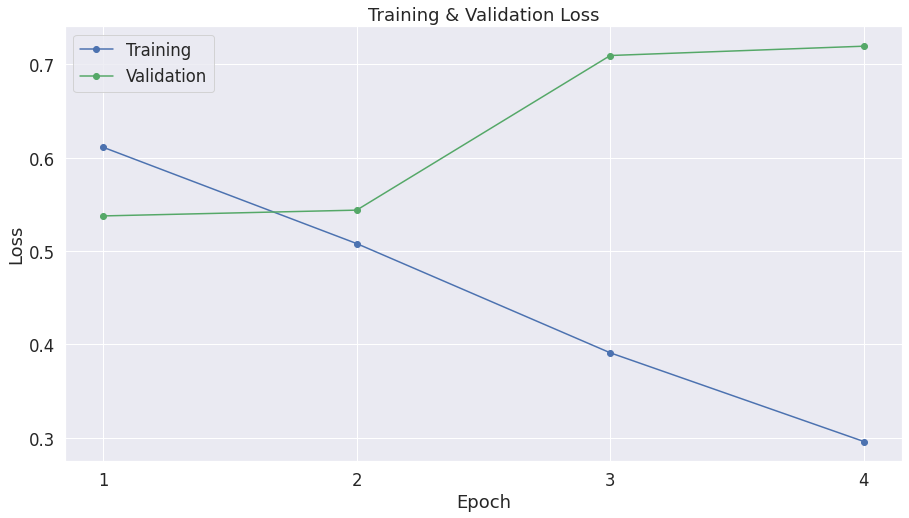

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='whitegrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (15,8)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()

In [28]:
import pandas as pd

# Load the dataset into a pandas dataframe.
df = pd.read_csv("./cola_public/raw/out_of_domain_dev.tsv", delimiter='\t', header=None, names=['sentence_source', 'label', 'label_notes', 'sentence'])

# Report the number of sentences.
print('Number of test sentences: {:,}\n'.format(df.shape[0]))

# Create sentence and label lists
sentences = df.sentence.values
labels = df.label.values

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...

for sent in sentences:

    encoded_dict = tokenizer.encode_plus(
                        sent,                      
                        add_special_tokens = True, 
                        max_length = 64,          
                        pad_to_max_length = True,
                        return_attention_mask = True,   
                        return_tensors = 'pt',     
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Set the batch size.  
batch_size = 32  

# Create the DataLoader.
prediction_data = TensorDataset(input_ids, attention_masks, labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Number of test sentences: 516



/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:2336: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [29]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch

  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)

  logits = outputs[0]

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

Predicting labels for 516 test sentences...


## MCC Score

Calculating Matthews Corr. Coef. for each batch...


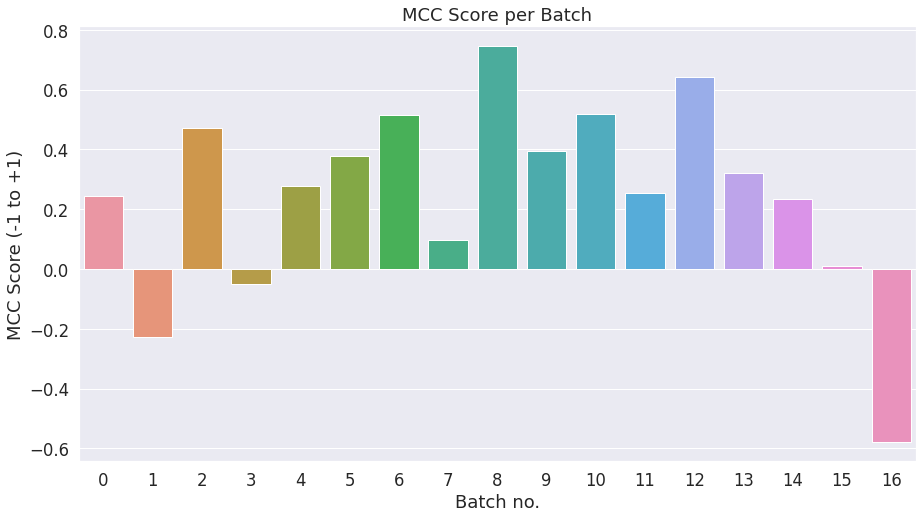

Total MCC: 0.289


In [30]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score

matthews_set = []

# Evaluate each test batch using Matthew's correlation coefficient
print('Calculating Matthews Corr. Coef. for each batch...')

# For each input batch...
for i in range(len(true_labels)):

  pred_labels_i = np.argmax(predictions[i], axis=1).flatten()
  # Calculate and store the coef for this batch.  
  matthews = matthews_corrcoef(true_labels[i], pred_labels_i)                
  matthews_set.append(matthews)

# Create a barplot showing the MCC score for each batch of test samples.
ax = sns.barplot(x=list(range(len(matthews_set))), y=matthews_set, ci=None)
plt.title('MCC Score per Batch')
plt.ylabel('MCC Score (-1 to +1)')
plt.xlabel('Batch no.')
plt.show()

# Combine the results across all batches. 
flat_predictions = np.concatenate(predictions, axis=0)
# For each sample, pick the label (0 or 1) with the higher score.
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()
# Combine the correct labels for each batch into a single list.
flat_true_labels = np.concatenate(true_labels, axis=0)
# Calculate the MCC
mcc = matthews_corrcoef(flat_true_labels, flat_predictions)
print('Total MCC: %.3f' % mcc)

## Confusion Matrix

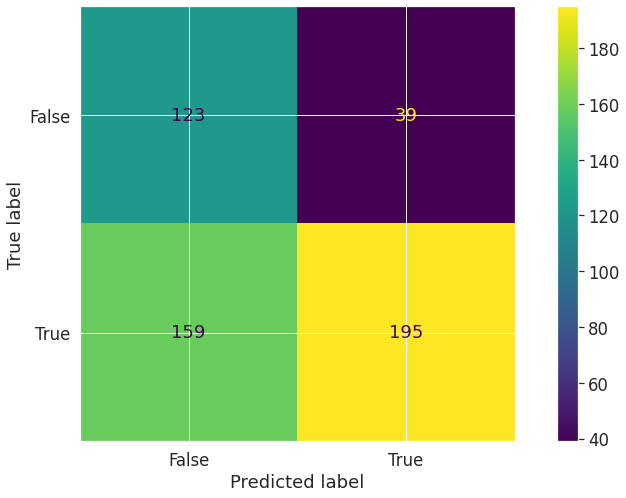

In [31]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = flat_true_labels
predicted = flat_predictions

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

## Word cloud

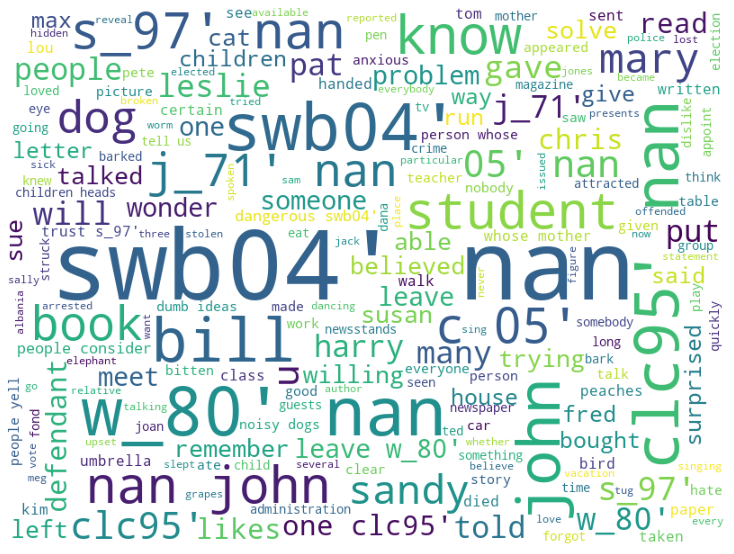

In [32]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
# Reads 'Youtube04-Eminem.csv' file
df = pd.read_csv("./cola_public/raw/out_of_domain_dev.tsv", delimiter='\t', header=None, names=['sentence_source', 'label', 'label_notes', 'sentence'])
 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.values:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 600,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 12).generate(comment_words)
 
# plot the WordCloud image
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [33]:
# precision
from sklearn.metrics import precision_score
prec= precision_score(flat_true_labels, flat_predictions, average='weighted') # average can be changed between micro, macro and weighted

In [34]:
# recall
from sklearn.metrics import recall_score
recall= recall_score(flat_true_labels, flat_predictions, average='micro')

In [35]:
# f1 score
from sklearn.metrics import f1_score
actual = flat_true_labels
pred = flat_predictions
f1= f1_score(actual, pred)

In [36]:
# accuracy
from sklearn.metrics import accuracy_score
acc= accuracy_score(flat_true_labels, flat_predictions)

In [37]:
print("The metrics score for our model are:")
print("*****************************************")
print("Precision is: ", prec)
print("Recall is: ", recall)
print("F1 score is: ", f1)
print("Accuracy is: ", acc)
print("*****************************************")

The metrics score for our model are:
*****************************************
Precision is:  0.7086425861784595
Recall is:  0.6162790697674418
F1 score is:  0.663265306122449
Accuracy is:  0.6162790697674418
*****************************************


In [46]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [38]:
import os

output_dir = '/content/gdrive/MyDrive/Colab Notebooks/XLNET/'
# Create output directory if needed
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)

model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

Saving model to /content/gdrive/MyDrive/Colab Notebooks/XLNET/


('/content/gdrive/MyDrive/Colab Notebooks/XLNET/tokenizer_config.json',
 '/content/gdrive/MyDrive/Colab Notebooks/XLNET/special_tokens_map.json',
 '/content/gdrive/MyDrive/Colab Notebooks/XLNET/spiece.model',
 '/content/gdrive/MyDrive/Colab Notebooks/XLNET/added_tokens.json')

In [39]:
from transformers import XLNetTokenizer,XLNetForSequenceClassification
# Load the XLNET tokenizer and model.
print('Loading XLNET tokenizer...')
tokenizer = XLNetTokenizer.from_pretrained(output_dir)
print('Loading XLNET model...')
model_loaded = XLNetForSequenceClassification.from_pretrained(output_dir)

Loading XLNET tokenizer...
Loading XLNET model...


In [65]:
#sent = "The French are certainly misunderstood: — but whether the fault is theirs, in not sufficiently explaining themselves, or speaking with that exact limitation and precision which one would expect on a point of such importance, and which, moreover, is so likely to be contested by us — or whether the fault may not be altogether on our side, in not understanding their language always so critically as to know “what they would be at” — I shall not decide; but ‘tis evident to me, when they affirm, “That they who have seen Paris, have seen every thing,” they must mean to speak of those who have seen it by day-light."
#sent = "Buffalo buffalo Buffalo buffalo buffalo buffalo Buffalo buffalo."
#sent = "James while John had had had had had had had had had had had a better effect on the teacher."
#sent = "Rose rose to put rose roes on her rows of roses."
#sent = "Will, will will will will will's will?"
#sent = "The complex houses married and single soldiers and their families."
#sent = "If I was a rich man, I would buy you a new shirt."
#sent = "We're finished cleaning the bathroom."
#sent = "A little spark kindles great fire."
#sent = "They had no sooner arrived then they were arguing."
sent = "My sister's all the books have been stolen."
encoded_dict = tokenizer.encode_plus(
                        sent,                      
                        add_special_tokens = True,
                        max_length = 64,           
                        pad_to_max_length = True,
                        return_attention_mask = True,  
                        return_tensors = 'pt',    
                   )
    
    # Add the encoded sentence to the list.    
input_id = encoded_dict['input_ids']
    
    # And its attention mask (simply differentiates padding from non-padding).
attention_mask = encoded_dict['attention_mask']
input_id = torch.LongTensor(input_id)
attention_mask = torch.LongTensor(attention_mask)

In [66]:
with torch.no_grad():
  # Forward pass, calculate logit predictions
  outputs = model_loaded(input_id, token_type_ids=None, attention_mask=attention_mask)

logits = outputs[0]
index = logits.argmax()
if index == 1:
  print("Gramatically correct")
else:
  print("Gramatically in-correct")

Gramatically in-correct


## POS Tagger

In [42]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
tokens = nltk.word_tokenize(sent)
print(tokens)
tag = nltk.pos_tag(tokens)
print(tag)
grammar = "NP: {<DT>?<JJ>*<NN>}"
cp  =nltk.RegexpParser(grammar)
result = cp.parse(tag)
print(result)
#result.draw() 
#root.mainloop()

['Buffalo', 'buffalo', 'Buffalo', 'buffalo', 'buffalo', 'buffalo', 'Buffalo', 'buffalo', '.']
[('Buffalo', 'NNP'), ('buffalo', 'NN'), ('Buffalo', 'NNP'), ('buffalo', 'NN'), ('buffalo', 'NN'), ('buffalo', 'NN'), ('Buffalo', 'NNP'), ('buffalo', 'NN'), ('.', '.')]
(S
  Buffalo/NNP
  (NP buffalo/NN)
  Buffalo/NNP
  (NP buffalo/NN)
  (NP buffalo/NN)
  (NP buffalo/NN)
  Buffalo/NNP
  (NP buffalo/NN)
  ./.)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## POS Counter

In [43]:
from collections import Counter
import nltk
lower_case = sent.lower()
tokens = nltk.word_tokenize(lower_case)
tags = nltk.pos_tag(tokens)
counts = Counter( tag for word,  tag in tags)
print(counts)

Counter({'NN': 8, '.': 1})


## Frequency distribution plot

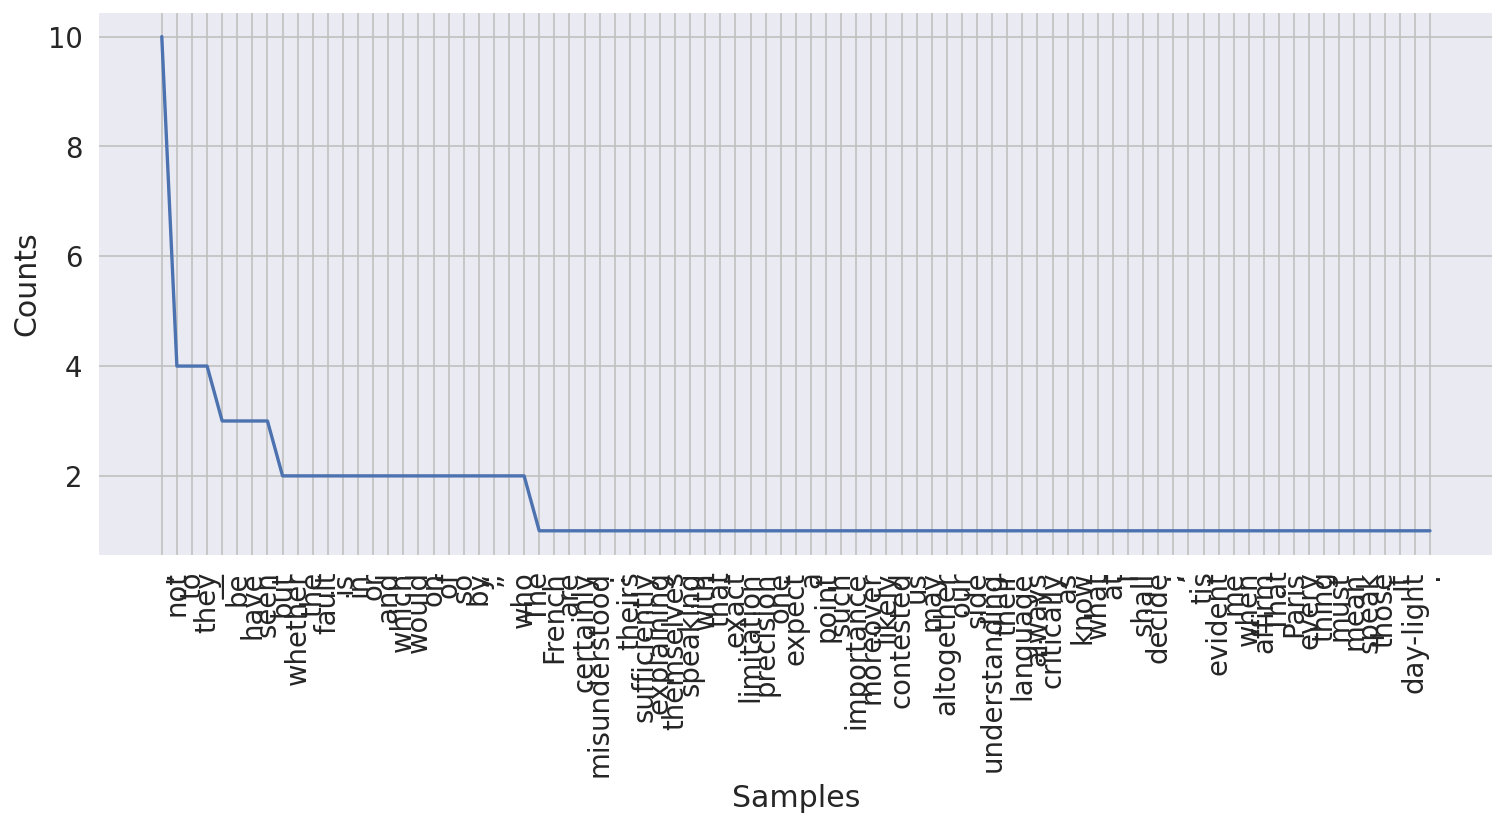

In [46]:
import nltk
%matplotlib inline
from matplotlib.pyplot import figure
figure(figsize=(15, 6), dpi=120)
words = nltk.tokenize.word_tokenize(sent)
fd = nltk.FreqDist(words)
fd.plot()

## Checking our XLNet model

## COLAB Specifications

In [1]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   24G   85G  22% /
tmpfs            64M     0   64M   0% /dev
shm             5.8G     0  5.8G   0% /dev/shm
/dev/root       2.0G  1.1G  910M  54% /sbin/docker-init
tmpfs           6.4G   44K  6.4G   1% /var/colab
/dev/sda1        41G   25G   16G  61% /etc/hosts
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [2]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
address sizes

In [3]:
!cat /proc/meminfo

MemTotal:       13297228 kB
MemFree:         9444356 kB
MemAvailable:   11988532 kB
Buffers:           64836 kB
Cached:          2593192 kB
SwapCached:            0 kB
Active:           736556 kB
Inactive:        2896504 kB
Active(anon):        888 kB
Inactive(anon):   899436 kB
Active(file):     735668 kB
Inactive(file):  1997068 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               272 kB
Writeback:             0 kB
AnonPages:        975112 kB
Mapped:           223244 kB
Shmem:              1168 kB
KReclaimable:     105784 kB
Slab:             134872 kB
SReclaimable:     105784 kB
SUnreclaim:        29088 kB
KernelStack:        4144 kB
PageTables:        22824 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6648612 kB
Committed_AS:    2543712 kB
VmallocTotal:   34359738367 kB
VmallocUsed:        8888 kB
VmallocChunk:          0 kB
Percpu:          